(i) Problem Definition

My aim to **predict the delivery duration** (in minutes) of food orders based on features like order size, item prices, store type, and delivery partner availability.

This is a classic **regression problem** (estimation) where the target variable is:
`delivery_duration = actual_delivery_time - created_at`

By predicting delivery time, we help optimize delivery logistics and improve customer satisfaction.


 Step (ii): Load & Explore Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/dataset.csv')


In [3]:
print("Columns:", df.columns.tolist())
print("Shape:", df.shape)
display(df.describe())

Columns: ['market_id', 'created_at', 'actual_delivery_time', 'store_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']
Shape: (43571, 14)


,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,43354.000000,43349.000000,43570.000000,43570.000000,43570.000000,43570.000000,43570.000000,39995.000000,39995.000000,39995.000000
mean,2.965862,2.757249,3.270874,2727.060799,2.720381,680.906426,1181.244870,44.593899,41.628879,58.067033
std,1.500071,1.461957,2.604810,1844.933691,1.661891,535.805481,581.274232,34.728869,32.342151,53.131958
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-2.000000,-1.000000,-6.000000
25%,2.000000,1.000000,2.000000,1450.000000,2.000000,295.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2250.000000,2.000000,579.000000,1095.000000,36.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3450.000000,3.000000,925.000000,1400.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,57.000000,18370.000000,20.000000,7475.000000,8500.000000,171.000000,154.000000,285.000000


In [5]:
type(df)  #data type

pandas.core.frame.DataFrame

In [7]:
df.shape # check dimension

(43571, 14)

In [9]:
df.isnull().sum()

,0
market_id,217
created_at,1
actual_delivery_time,3
store_id,1
store_primary_category,1058
order_protocol,222
total_items,1
subtotal,1
num_distinct_items,1
min_item_price,1


In [11]:
#Show me the locations where the null values are
df[df.isnull().any(axis=1)]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3.0,3900.0,3.0,1100.0,1600.0,6.0,6.0,9.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,f0ade77b43923b38237db569b016ba25,NaN,1.0,3.0,5000.0,3.0,1500.0,1900.0,2.0,2.0,2.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,2.0,3900.0,2.0,1200.0,2700.0,10.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43472,6.0,2015-02-08 05:00:10,2015-02-08 05:29:15,f563f708bcb697a865cb29220f8158d1,thai,3.0,1.0,1295.0,1.0,1295.0,1295.0,NaN,NaN,NaN
43473,6.0,2015-01-25 19:38:04,2015-01-25 20:32:49,f563f708bcb697a865cb29220f8158d1,thai,3.0,3.0,3585.0,3.0,995.0,1195.0,NaN,NaN,NaN
43474,6.0,2015-02-05 03:22:54,2015-02-05 04:32:51,f563f708bcb697a865cb29220f8158d1,thai,3.0,2.0,2490.0,2.0,1195.0,1295.0,NaN,NaN,NaN
43559,6.0,2015-01-22 23:33:12,2015-01-22 23:53:38,2255538166d2e6f3c6097c2c4df4e0be,NaN,2.0,1.0,1155.0,1.0,905.0,905.0,15.0,9.0,7.0


In [13]:
# Dropping those records having null values from the df DataFrame
df = df.dropna()

In [15]:
# Dropping those records having null values from the df DataFrame
df = df.dropna()

# Check for nulls in the df DataFrame
df.isnull().sum()

,0
market_id,0
created_at,0
actual_delivery_time,0
store_id,0
store_primary_category,0
order_protocol,0
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


In [17]:
# printing the shape -- Yes, 15 rows containing null values are removed
df.shape

(38915, 14)

In [19]:
# checking the data type of every column
df.dtypes

,0
market_id,float64
created_at,object
actual_delivery_time,object
store_id,object
store_primary_category,object
order_protocol,float64
total_items,float64
subtotal,float64
num_distinct_items,float64
min_item_price,float64


(ii): Exploratory Data Analysis

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.54 µs


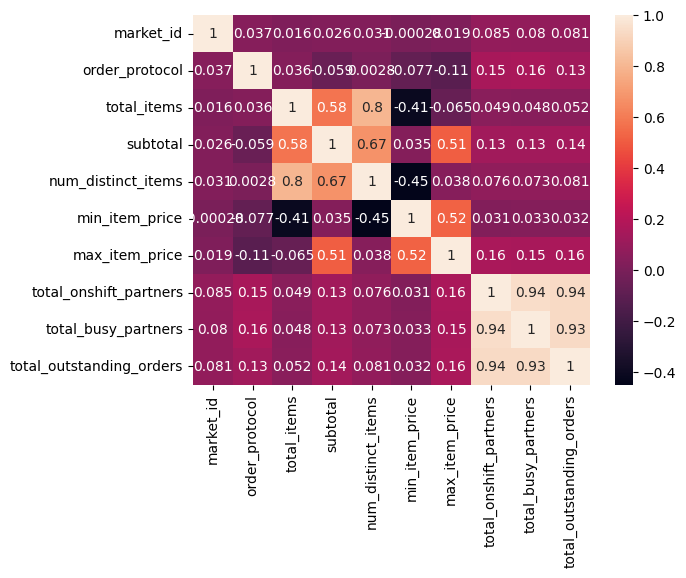

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix for numerical columns
%time
corr = df.select_dtypes(include=['number']).corr()

# Plot heatmap
sns.heatmap(corr, annot=True, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [1]:
!pip install fireducks # optional for the assignment


CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 13.1 µs


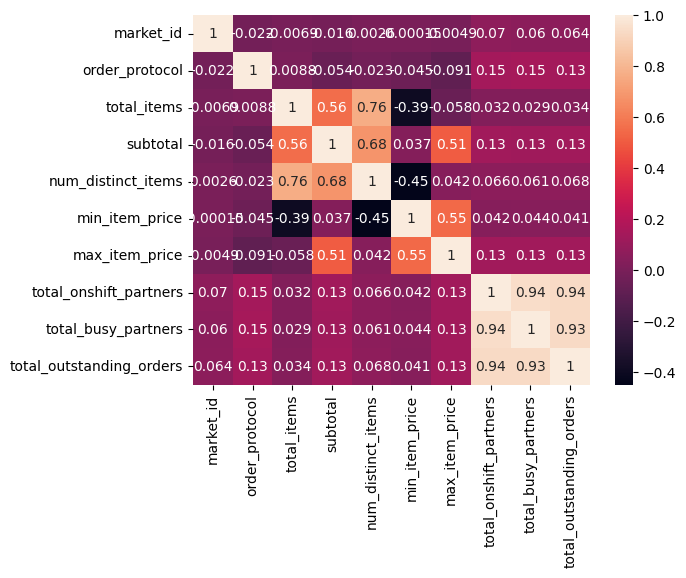

In [4]:
import pandas as pd # Import pandas to read the CSV
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset - Ensure this is executed before using df
df = pd.read_csv('/content/dataset.csv')

# Compute correlation matrix for numerical columns
%time
corr = df.select_dtypes(include=['number']).corr()

# Plot heatmap
sns.heatmap(corr, annot=True, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [10]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')


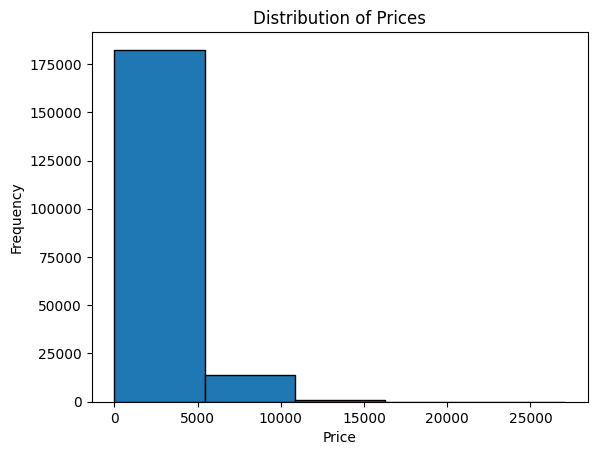

In [13]:
import matplotlib.pyplot as plt

# Assuming the DataFrame is named 'df'.
# Check the column names to find the correct price column.
print(df.columns)

# Replace 'price_usd' with the actual column name for price.
# For example, if the column is named 'subtotal', use:
df['subtotal'].plot(kind = 'hist', bins = 5, edgecolor='black')   # 5 bins are used
plt.xlabel('Price') # You might want to change this label to reflect the actual column
plt.ylabel('Frequency')
plt.title('Distribution of Prices') # You might want to change this title
plt.show()

In [15]:
df.describe(include = 'object') #summary statistics for categorical values

,created_at,actual_delivery_time,store_id,store_primary_category
count,197428,197421,197428,192668
unique,180985,178110,6743,74
top,2015-01-24 01:56:33,2015-02-01 03:44:13,d43ab110ab2489d6b9b2caa394bf920f,american
freq,6,5,937,19399


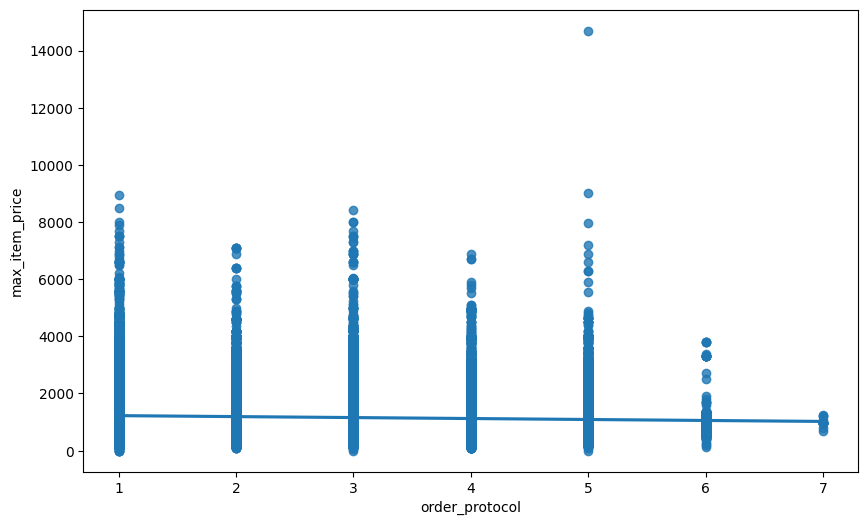

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.regplot(x="order_protocol", y="max_item_price", data=df)
plt.show()

In [31]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['order_protocol'], df['max_item_price'])
print("The Pearson Correlation Coefficient between order_protocol and max_item_price is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient between order_protocol and max_item_price is nan  with a P-value of P = nan


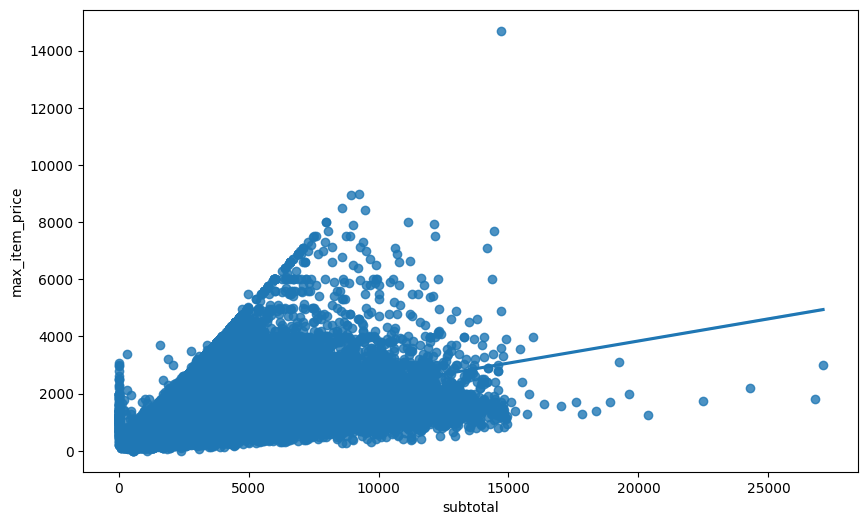

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.regplot(x="subtotal", y="max_item_price", data=df)
plt.show()

In [32]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['subtotal'], df['max_item_price'])
print("The Pearson Correlation Coefficient between subtotal and max_item_price is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient between subtotal and max_item_price is 0.5055468508163949  with a P-value of P = 0.0


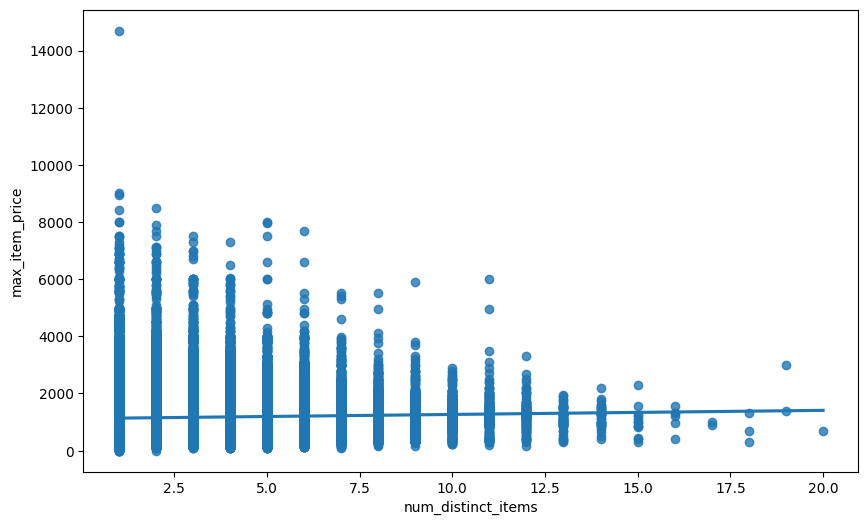

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.regplot(x="num_distinct_items", y="max_item_price", data=df)
plt.show()

In [33]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['num_distinct_items'], df['max_item_price'])
print("The Pearson Correlation Coefficient between num_distinct_items and max_item_price is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient between num_distinct_items and max_item_price is 0.0418707570607867  with a P-value of P = 2.5482666926467895e-77


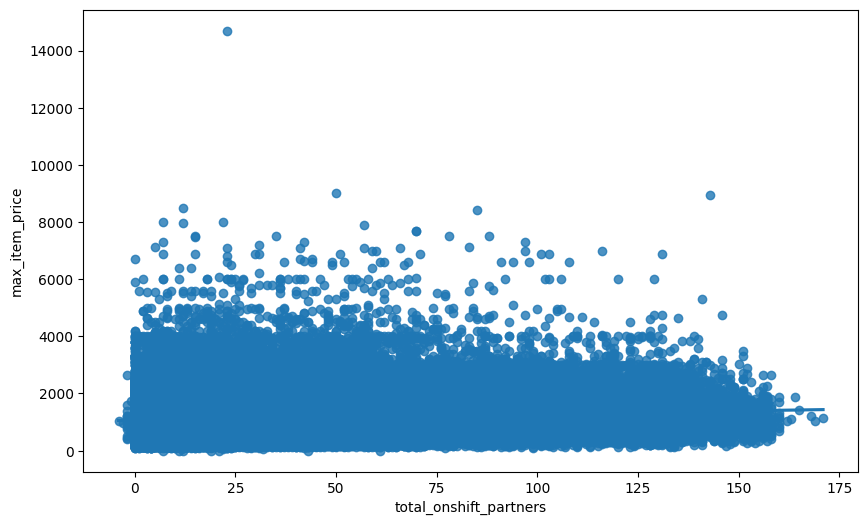

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.regplot(x="total_onshift_partners", y="max_item_price", data=df)
plt.show()

In [34]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['total_onshift_partners'], df['max_item_price'])
print("The Pearson Correlation Coefficient between total_onshift_partners and max_item_price is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient between total_onshift_partners and max_item_price is nan  with a P-value of P = nan


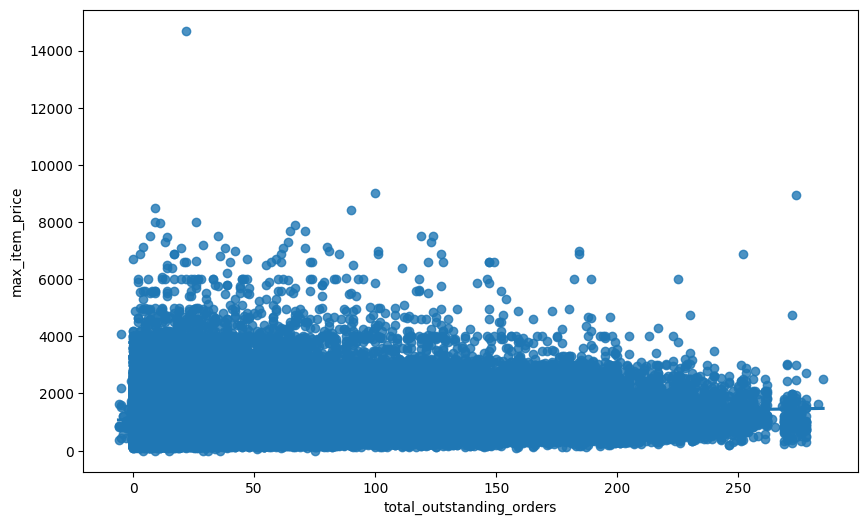

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.regplot(x="total_outstanding_orders", y="max_item_price", data=df)
plt.show()

In [35]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['total_outstanding_orders'], df['max_item_price'])
print("The Pearson Correlation Coefficient between total_onshift_partners and max_item_price is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient between total_onshift_partners and max_item_price is nan  with a P-value of P = nan


In [ ]:
# Pearson correlations and p-values
features = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price']
for feature in features:
    corr, p_val = pearsonr(df[feature], df['delivery_duration'])
    print(f"{feature}: Pearson r = {corr:.3f}, p-value = {p_val:.3e}")

total_items: Pearson r = -0.005, p-value = 5.318e-01
subtotal: Pearson r = -0.000, p-value = 9.624e-01
num_distinct_items: Pearson r = -0.005, p-value = 4.704e-01
min_item_price: Pearson r = 0.014, p-value = 7.318e-02
max_item_price: Pearson r = 0.008, p-value = 2.824e-01


Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')


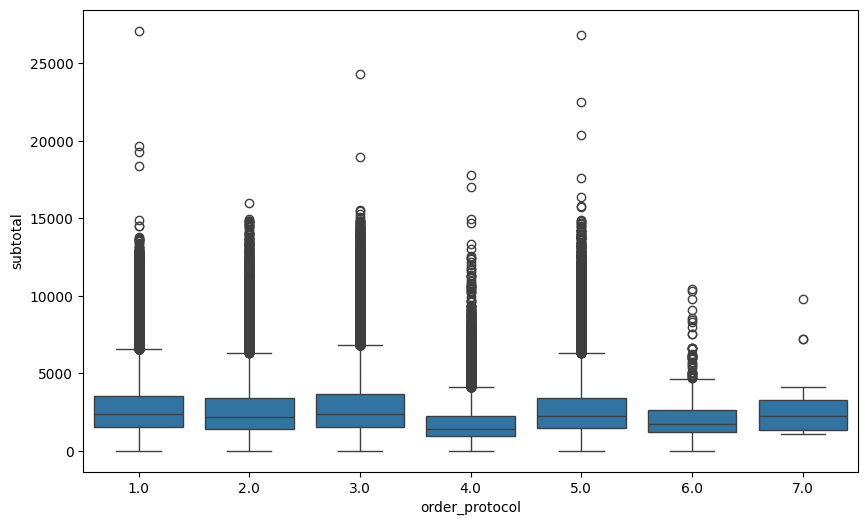

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
# Check the column names in your DataFrame
print(df.columns)
plt.figure(figsize=(10, 6))
sns.boxplot(x="order_protocol", y="subtotal", data=df)
plt.show()


Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')


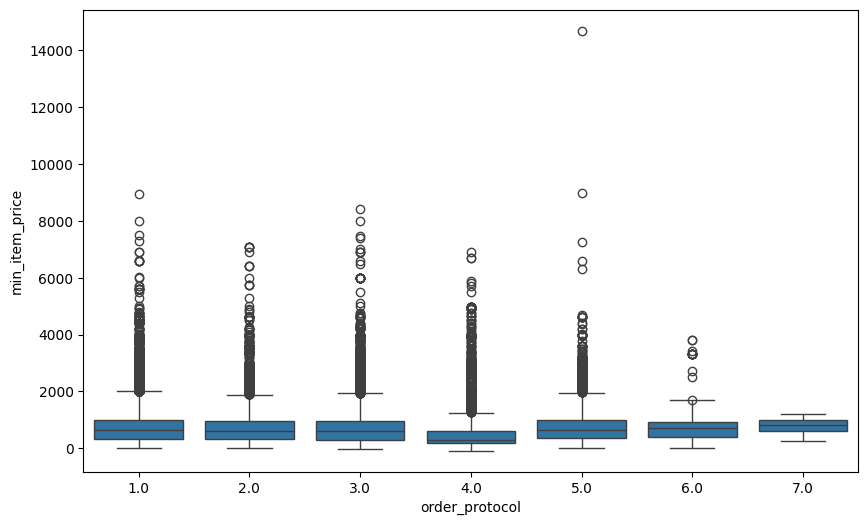

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
# Check the column names in your DataFrame
print(df.columns)
plt.figure(figsize=(10, 6))
sns.boxplot(x="order_protocol", y="min_item_price", data=df)
plt.show()


Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')


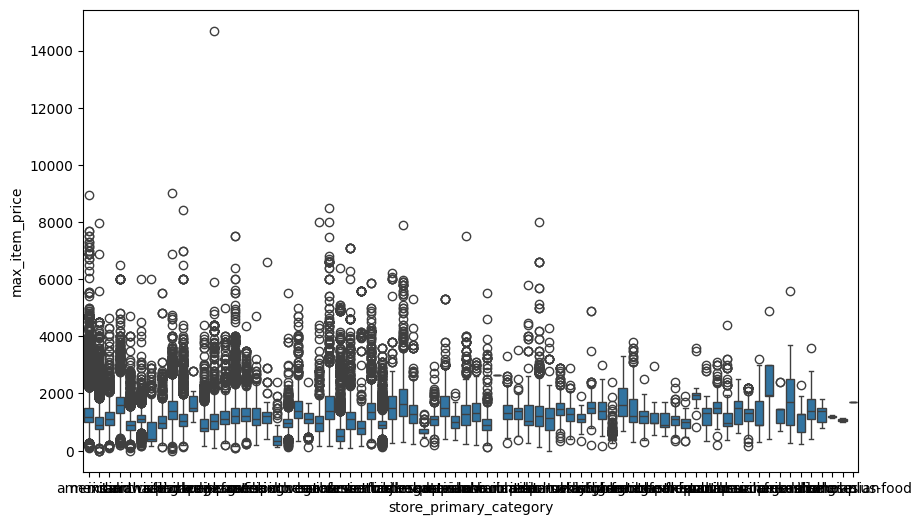

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
# Check the column names in your DataFrame
print(df.columns)
plt.figure(figsize=(10, 6))
sns.boxplot(x="store_primary_category", y="max_item_price", data=df)
plt.show()


Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')


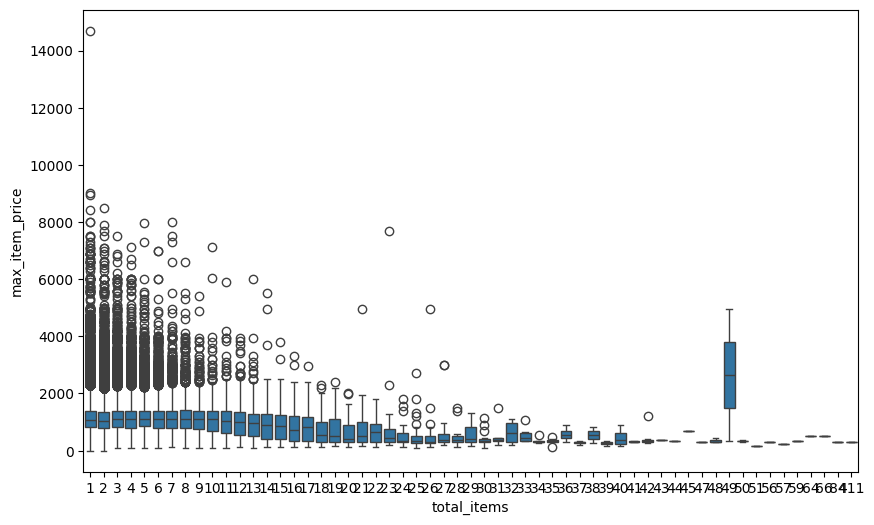

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
# Check the column names in your DataFrame
print(df.columns)
plt.figure(figsize=(10, 6))
sns.boxplot(x="total_items", y="max_item_price", data=df)
plt.show()

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')


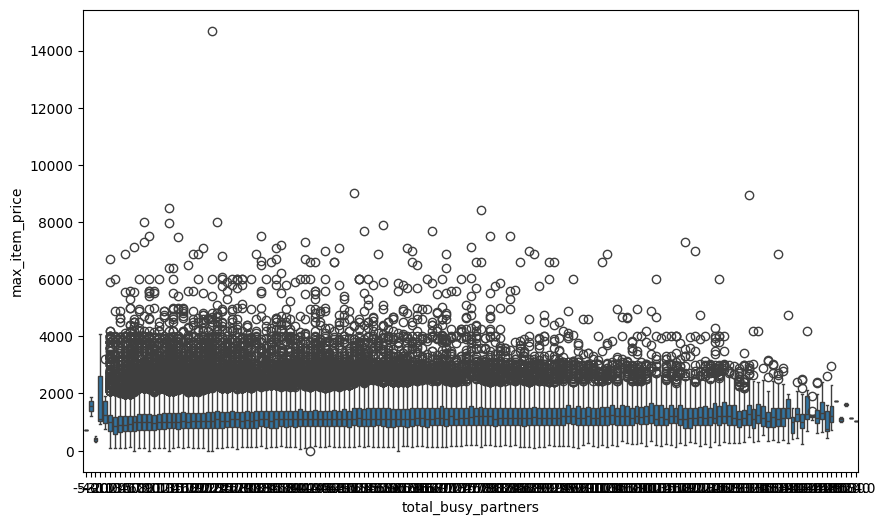

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
# Check the column names in your DataFrame
print(df.columns)
plt.figure(figsize=(10, 6))
sns.boxplot(x="total_busy_partners", y="max_item_price", data=df)
plt.show()

(iii): Data Cleaning & Transformation

In [49]:
# Handle categorical feature
df['store_primary_category'] = df['store_primary_category'].fillna("unknown")
le = LabelEncoder()
df['store_primary_category'] = le.fit_transform(df['store_primary_category'])


In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['store_primary_category'] = le.fit_transform(df['store_primary_category'])

In [59]:
df.head(10)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,47,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,71,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,71,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,71,1.0,3,3900,3,1100,1600,6.0,6.0,9.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,f0ade77b43923b38237db569b016ba25,71,1.0,3,5000,3,1500,1900,2.0,2.0,2.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,f0ade77b43923b38237db569b016ba25,71,1.0,2,3900,2,1200,2700,10.0,9.0,9.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,f0ade77b43923b38237db569b016ba25,71,1.0,4,4850,4,750,1800,7.0,8.0,7.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,f0ade77b43923b38237db569b016ba25,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,f0ade77b43923b38237db569b016ba25,71,1.0,2,2100,2,700,1200,2.0,2.0,2.0


In [68]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load your dataset
dataTrain = pd.read_csv("/content/dataset.csv")

In [69]:
# Optional: Inspect the data
print(dataTrain.head())

   market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:27:16   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:56:29   
2        3.0  2015-01-22 20:39:28  2015-01-22 21:09:09   
3        3.0  2015-02-03 21:21:45  2015-02-03 22:13:00   
4        3.0  2015-02-15 02:40:36  2015-02-15 03:20:26   

                           store_id store_primary_category  order_protocol  \
0  df263d996281d984952c07998dc54358               american             1.0   
1  f0ade77b43923b38237db569b016ba25                mexican             2.0   
2  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
3  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
4  f0ade77b43923b38237db569b016ba25                    NaN             1.0   

   total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      19

In [81]:
x_train.head()

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_capacity,body_type,has_warranty,ownership,type_of_drive,number_of_photos
54461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
y_train.head()

,price_usd
54461,NaN
72993,NaN
2603,NaN
148600,NaN
138926,NaN


In [83]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(138199, 12)
(138199, 1)
(59229, 12)
(59229, 1)


(iv): Apply Regression Models

In [88]:
import pandas as pd

# Load the dataset
# Changed the path to the likely location of the dataset in Google Colab
data = pd.read_csv('/content/dataset.csv')

# Display basic info and first few rows
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [92]:
# Check for missing values
print(data.isnull().sum())

# Convert 'created_at' and 'actual_delivery_time' to datetime objects
data['created_at'] = pd.to_datetime(data['created_at'])
data['actual_delivery_time'] = pd.to_datetime(data['actual_delivery_time'])

data['delivery_duration'] = (data['actual_delivery_time'] - data['created_at']).dt.total_seconds() / 60

X = data.drop(columns=['delivery_duration', 'created_at', 'actual_delivery_time'])
y = data['delivery_duration']

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
delivery_duration               7
dtype: int64


(v): Evaluate the Models

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Evaluation:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R² Score: {r2:.3f}")
    print("-" * 40)

# Evaluate both models
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest Regressor", y_test, y_pred_rf)


Linear Regression Evaluation:
  RMSE: 19.39
  R² Score: 0.133
----------------------------------------
Random Forest Regressor Evaluation:
  RMSE: 18.78
  R² Score: 0.187
----------------------------------------


In [ ]:
import joblib

# Save model and preprocessors
joblib.dump(rf_model, '/content/rf_model.joblib')
joblib.dump(scaler, '/content/scaler.pkl')
joblib.dump(le, '/content/label_encoders.pkl')



['/content/label_encoders.pkl']

In [ ]:
from google.colab import files
files.download('/content/scaler.pkl')
files.download('/content/label_encoders.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('/content/rf_model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>